<a href="https://colab.research.google.com/github/BugBoy13/ActivityRecognition/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/udacity/deep-learning/master/gradient-descent/data.csv

--2019-05-24 11:11:10--  https://raw.githubusercontent.com/udacity/deep-learning/master/gradient-descent/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1778 (1.7K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.74K  --.-KB/s    in 0s      

2019-05-24 11:11:10 (274 MB/s) - ‘data.csv’ saved [1778/1778]



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    

In [0]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

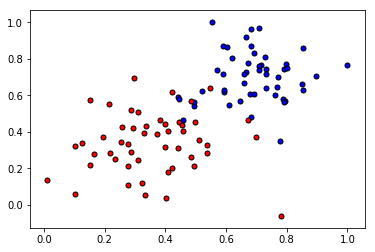

In [5]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1/1+np.exp(-x)

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output) - (1 - y)* np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = - (y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

In [0]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

In [0]:
def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 100) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars



========== Epoch 0 ==========
Train loss:  nan
Accuracy:  0.49

========== Epoch 1 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 2 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 3 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 4 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 5 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 6 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 7 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 8 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 9 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 11 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 12 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 13 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 14 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 15 ==========
Train loss:  nan


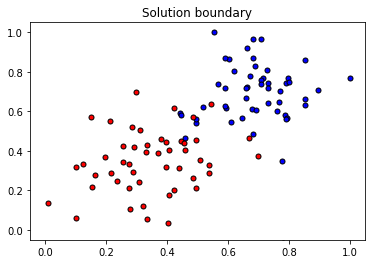

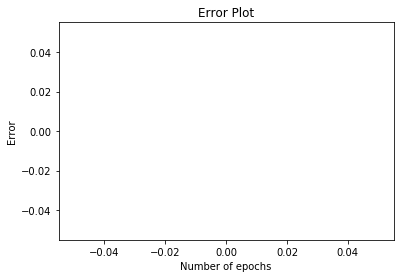

In [9]:
train(X, y, epochs, learnrate, True)